## 1. Import Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 2. Import Dataset and Check It Out

In [73]:
df = pd.read_csv('data/train.csv')

In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
df.shape

(891, 12)

In [76]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [78]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. Missing Values

* Cabin

* Age

* Embarked

### 3.1 Cabin

In [79]:
df['Cabin'].value_counts().sum() / df.shape[0] * 100

22.895622895622896

%77 empyt of data. It's too high! We have to drop this column

### 3.2 Age

In [80]:
df['Age'].value_counts().sum() / df.shape[0] * 100

80.13468013468014

<AxesSubplot:xlabel='Age', ylabel='Count'>

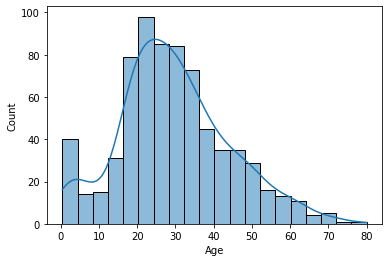

In [81]:
sns.histplot(data=df, x=df["Age"], kde=True)

In [82]:
print("Mean :", df['Age'].mean(skipna=True))
print("Median :", df['Age'].median(skipna=True))

Mean : 29.69911764705882
Median : 28.0


`We could fill this column with median but instead that we will fill each class according to pclass mean. this way, Age values could be more close to real values, more reflect values`

In [83]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

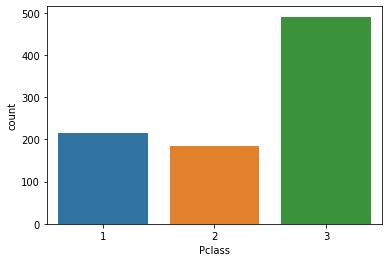

In [84]:
sns.countplot(x=df['Pclass'])

### 3.3 Embarked

In [85]:
df['Embarked'].value_counts().sum() / df.shape[0] * 100

99.77553310886644

`It's almost full. We could fill with the most frequency value. (Because of it is a categorical value)`

<AxesSubplot:xlabel='Embarked', ylabel='count'>

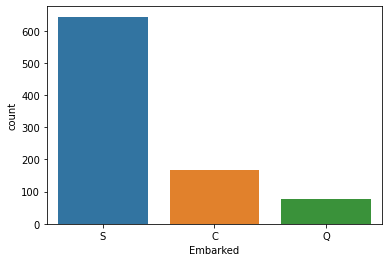

In [86]:
sns.countplot(x=df['Embarked'])

`That value we use is 'S'.`

### 3.4 Let's Handle them

In [87]:
data = df.copy()

In [88]:
# for Cabin

data.drop(['Cabin'], axis=1, inplace=True)

In [89]:
p_1 = data[df['Pclass'] == 1]['Age'].mean()

# or 
# filt = df['Pclass'] == 1
# df.where(filt)['Age'].mean()
# or
# data["Age"][data.Pclass == 1].mean()

In [90]:
p_2 = data[df['Pclass'] == 2]['Age'].mean()

In [91]:
p_3 = data[df['Pclass'] == 3]['Age'].mean()

**Pandas.apply()** -> Allow the users to pass a function and apply it on every single value of the Pandas series.

In [92]:
def filling_age(columns):
    
    age = columns[0]
    p_class = columns[1]
    
    if pd.isnull(age):
        
        if p_class == 1:
            return p_1

        elif p_class == 2:
            return p_2

        elif p_class == 3:
            return p_3
        
    else:
        return age

In [93]:
data['Age'] = data[['Age', 'Pclass']].apply(filling_age, axis=1)

In [94]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [95]:
# for Embarked

data['Embarked'].fillna('S', inplace=True)

In [96]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 3.5 Feature Analysis

as write on the kaggle Variable Notes -> https://www.kaggle.com/competitions/titanic/data

**sibsp:** The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

**Actually two column of them look very similiar we just could merge them to one column** 

There is a too much correlation

In [97]:
data["IsAlone"] = np.where(df["SibSp"] + df["Parch"] > 0, 0, 1)
data["IsAlone"]

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: IsAlone, Length: 891, dtype: int32

**Now, we could drop these columns**

In [98]:
data.drop(["SibSp", "Parch"], axis=1, inplace=True)

In [99]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Embarked', 'IsAlone'],
      dtype='object')

### 4. Exploratory Data Analysis (EDA)

Firstly, we dont need to PassengerId, Name and Ticket, we will be drop these column. They can't be effective for predict quality. 

We do this but later. Now, we must **Exploratory Data Analysis**

We take a look data is: 

**Numeric Values**

* Fare 

* Age

**Categorical Values**

* IsAlone

* Sex

* Pclass

#### 4.1 Age

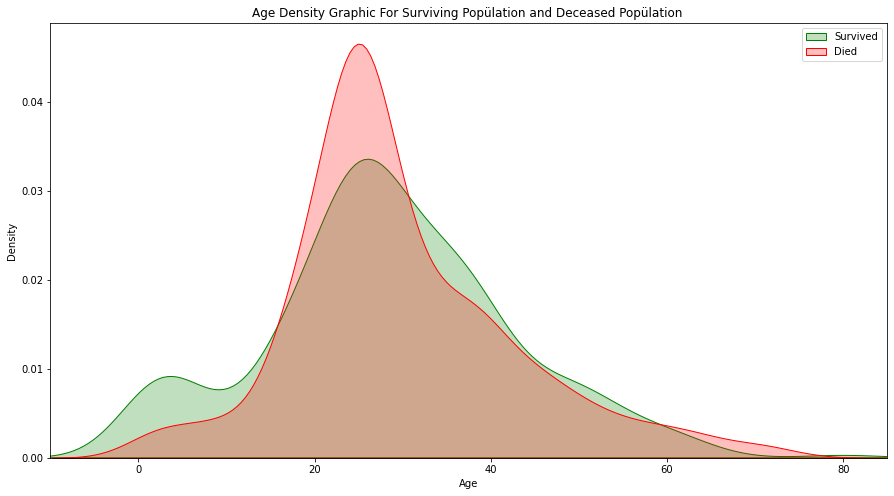

In [100]:
plt.figure(figsize=(15,8))

# Survived == 1
ax = sns.kdeplot(data["Age"][data.Survived == 1], color="green", shade=True)

# Survived == 0
sns.kdeplot(data["Age"][data.Survived == 0], color="red", shade=True)

plt.legend(['Survived', 'Died'])
plt.title('Age Density Graphic For Surviving Popülation and Deceased Popülation ')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()


**We could say that survived population is most of them are young or child**

#### 4.2 Fare

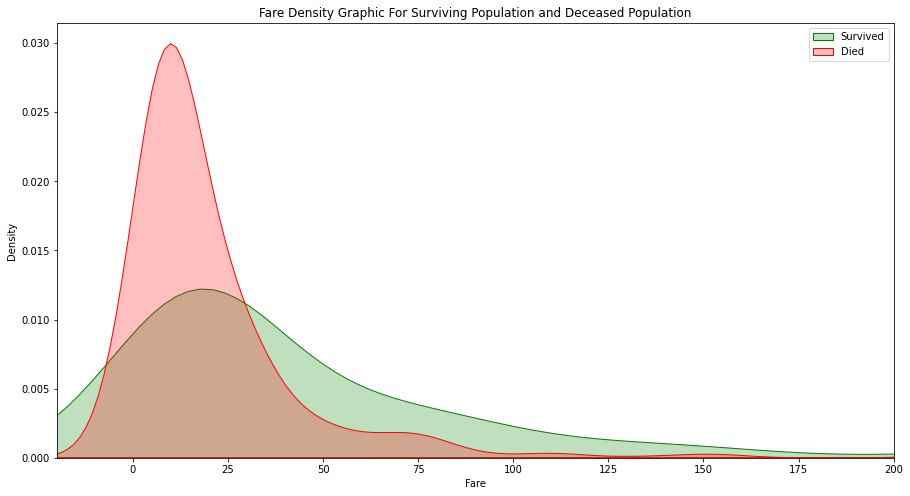

In [101]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(data["Fare"][data.Survived == 1], color="green", shade=True)

sns.kdeplot(data["Fare"][data.Survived == 0], color="red", shade=True)

plt.legend(['Survived', 'Died'])
plt.title('Fare Density Graphic For Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

**Fare is important for surviving**

#### 4.3 Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

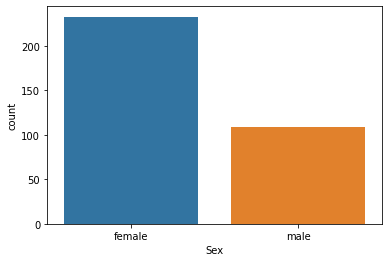

In [102]:
sns.countplot(x=data["Sex"][data.Survived == 1])

<AxesSubplot:xlabel='Sex', ylabel='count'>

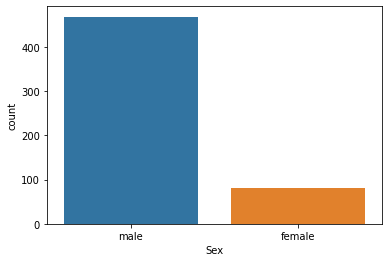

In [103]:
sns.countplot(x=data["Sex"][data.Survived == 0])

**Looks like sex might be important for surviving**

#### 4.4 Pclass

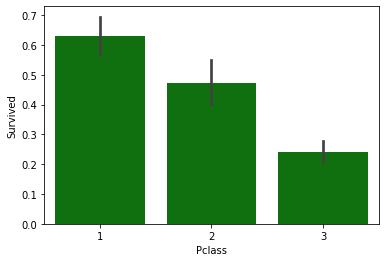

In [104]:
sns.barplot('Pclass', 'Survived', data=data, color="green")

plt.show()

**I guess being a upper side is better for surviving**

#### 4.5 IsAlone

<AxesSubplot:xlabel='IsAlone', ylabel='count'>

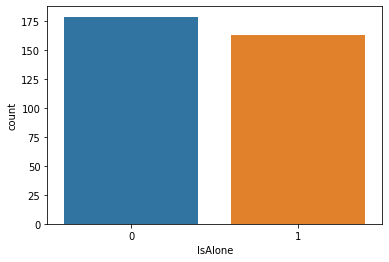

In [105]:
sns.countplot(x=data["IsAlone"][data.Survived == 1])

<AxesSubplot:xlabel='IsAlone', ylabel='count'>

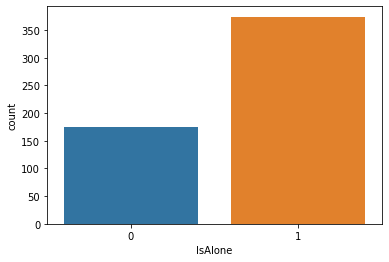

In [106]:
sns.countplot(x=data["IsAlone"][data.Survived == 0])

**maybe if your family with you, then you have more chance for surviving**

### 5. Categorical Feature

In [107]:
cat_columns = data.select_dtypes(include=['object']).columns
cat_columns

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

**Ordinal and Nominal Feature**

Again as write on the kaggle Variable Notes -> https://www.kaggle.com/competitions/titanic/data

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

`So, we could think such as there is a order of importance for pclass`

**Ordinal**

* Pclass

**Nominal**

* Sex

* Embarked

---

**For Ordinal**

In [108]:
data['Pclass'] = df['Pclass'].map({1: 1, 2: 0, 3: -1})
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,IsAlone
0,1,0,-1,"Braund, Mr. Owen Harris",male,22.00000,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,PC 17599,71.2833,C,0
2,3,1,-1,"Heikkinen, Miss. Laina",female,26.00000,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,113803,53.1000,S,0
4,5,0,-1,"Allen, Mr. William Henry",male,35.00000,373450,8.0500,S,1
5,6,0,-1,"Moran, Mr. James",male,25.14062,330877,8.4583,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,17463,51.8625,S,1
7,8,0,-1,"Palsson, Master. Gosta Leonard",male,2.00000,349909,21.0750,S,0
8,9,1,-1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,347742,11.1333,S,0
9,10,1,0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,237736,30.0708,C,0


**For Nominal**

In [109]:
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
data

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Embarked,IsAlone,Sex_male
0,1,0,-1,"Braund, Mr. Owen Harris",22.00000,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00000,PC 17599,71.2833,C,0,0
2,3,1,-1,"Heikkinen, Miss. Laina",26.00000,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00000,113803,53.1000,S,0,0
4,5,0,-1,"Allen, Mr. William Henry",35.00000,373450,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,"Montvila, Rev. Juozas",27.00000,211536,13.0000,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.00000,112053,30.0000,S,1,0
888,889,0,-1,"Johnston, Miss. Catherine Helen ""Carrie""",25.14062,W./C. 6607,23.4500,S,0,0
889,890,1,1,"Behr, Mr. Karl Howell",26.00000,111369,30.0000,C,1,1


In [110]:
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
data

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,1,0,-1,"Braund, Mr. Owen Harris",22.00000,A/5 21171,7.2500,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00000,PC 17599,71.2833,0,0,0,0
2,3,1,-1,"Heikkinen, Miss. Laina",26.00000,STON/O2. 3101282,7.9250,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00000,113803,53.1000,0,0,0,1
4,5,0,-1,"Allen, Mr. William Henry",35.00000,373450,8.0500,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,"Montvila, Rev. Juozas",27.00000,211536,13.0000,1,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.00000,112053,30.0000,1,0,0,1
888,889,0,-1,"Johnston, Miss. Catherine Helen ""Carrie""",25.14062,W./C. 6607,23.4500,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.00000,111369,30.0000,1,1,0,0


### 6. Drop The Unnecessary Columns

* PassengerId

* Name 

* Ticket

In [111]:
data.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [112]:
data.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'IsAlone', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

### 7. Train-Test Split

In [113]:
y = data['Survived']

In [114]:
data.drop(['Survived'], axis=1, inplace=True)
X = data

In [115]:
X.shape

(891, 7)

In [116]:
y.shape

(891,)

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
X_train.shape, X_test.shape

((712, 7), (179, 7))

In [120]:
y_train.shape, y_test.shape

((712,), (179,))

### 8. Feature Scaling

In [121]:
cols = X_train.columns
cols

Index(['Pclass', 'Age', 'Fare', 'IsAlone', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [124]:
type(X_train)

numpy.ndarray

In [125]:
X_train = pd.DataFrame(X_train, columns=data.columns)
X_train

,Pclass,Age,Fare,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,1.614136,1.246821,-0.078684,0.812203,0.724310,-0.303355,0.592489
1,0.400551,-0.461278,-0.377145,0.812203,0.724310,-0.303355,0.592489
2,-0.813034,0.221962,-0.474867,0.812203,0.724310,-0.303355,0.592489
3,-0.813034,-0.233531,-0.476230,-1.231219,0.724310,-0.303355,0.592489
4,-0.813034,-1.751842,-0.025249,-1.231219,-1.380624,-0.303355,0.592489
...,...,...,...,...,...,...,...
707,-0.813034,-0.613109,-0.480162,0.812203,-1.380624,-0.303355,0.592489
708,1.614136,0.695177,-0.030545,0.812203,0.724310,-0.303355,0.592489
709,-0.813034,0.905202,-0.355804,-1.231219,0.724310,-0.303355,0.592489
710,1.614136,-1.144517,1.683201,-1.231219,-1.380624,-0.303355,0.592489


In [126]:
X_test = pd.DataFrame(X_test, columns=cols)
X_test

,Pclass,Age,Fare,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,-0.813034,-0.298772,-0.333901,-1.231219,0.724310,-0.303355,-1.687794
1,0.400551,0.146046,-0.425284,0.812203,0.724310,-0.303355,0.592489
2,-0.813034,-0.689024,-0.474867,0.812203,0.724310,-0.303355,0.592489
3,0.400551,-1.751842,0.007966,-1.231219,-1.380624,-0.303355,0.592489
4,-0.813034,-1.144517,-0.411002,-1.231219,-1.380624,-0.303355,-1.687794
...,...,...,...,...,...,...,...
174,-0.813034,-0.916771,-0.490271,0.812203,0.724310,-0.303355,0.592489
175,-0.813034,-0.298772,-0.488346,0.812203,0.724310,-0.303355,-1.687794
176,-0.813034,0.677455,-0.023083,-1.231219,-1.380624,-0.303355,0.592489
177,0.400551,-0.916771,-0.425284,0.812203,-1.380624,-0.303355,0.592489


`We need to turn back to pandas.DataFrame`

### 9. RandomizedSearchCV and XGBOOST

**XGBOOST**

In [127]:
from xgboost import XGBClassifier

In [128]:
xgb = XGBClassifier(random_state=0)

**RandomizedSearchCV**

In [129]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [130]:
cv = StratifiedKFold(shuffle=True, random_state=30)

params = dict({"learning_rate":[0.1, 0.3, 0.5, 0.75], "max_depth":[3, 4, 5, 6, 7], "n_estimators":[200, 300, 400, 500, 600]})
rs = RandomizedSearchCV(estimator=xgb, param_distributions=params, n_iter=3, scoring="roc_auc", cv=cv, random_state=0)

rs.fit(X_train, y_train)

[23:37:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:38] WARNING:

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=30, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=0,
                                           reg_alpha

In [131]:
print(f"Best Hyperparameters: {rs.best_params_}")
print(f"Best Score: {rs.best_score_}")

Best Hyperparameters: {'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.1}
Best Score: 0.842423863217005


In [132]:
rc_result = pd.DataFrame(rs.cv_results_).sort_values('mean_test_score', ascending= False)
print(rc_result)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2       0.284040      0.018230         0.007181        0.000747   
0       0.222200      0.012709         0.007380        0.001018   
1       0.262897      0.015676         0.007779        0.000399   

  param_n_estimators param_max_depth param_learning_rate  \
2                400               3                 0.1   
0                300               3                 0.3   
1                300               5                0.75   

                                              params  split0_test_score  \
2  {'n_estimators': 400, 'max_depth': 3, 'learnin...           0.843009   
0  {'n_estimators': 300, 'max_depth': 3, 'learnin...           0.846338   
1  {'n_estimators': 300, 'max_depth': 5, 'learnin...           0.836767   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
2           0.859655           0.887852           0.824571           0.797033   
0           0.854141       

---

### 10. Score

In [133]:
from sklearn.metrics import roc_auc_score

In [134]:
xgb = XGBClassifier(n_estimators=400, max_depth=3, learning_rate=0.1, random_state=0)
model = xgb.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

[23:37:42] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [135]:
print(f"ROC-AUC train score with XGBoost -> {roc_auc_score(y_train, pred_train)}")

print(f"ROC-AUC test score with XGBoost -> {roc_auc_score(y_test, pred_test)}")

ROC-AUC train score with XGBoost -> 0.9073551163103403
ROC-AUC test score with XGBoost -> 0.82998712998713
